Let's consider two continous non-independet random variables $X,Y$ with the joint probability density.

$$\frac{dP_{(X,Y)}}{d\lambda_L^2}(x,y) = \frac{\sqrt{15/16}}{2 \pi}e^{-0.5((x-5)^2 + (y-3)^2 + 0.5*(x-5)(y-3))}$$ 

The density above could represent two stocks $X,Y$ which are correlated with each other.

**Exercise 1:**
Calculate the following expressions:
1. The expectation value of $X$. $(E[X] = \int dP_{(X,Y)}(x,y) x)$
2. The expectation value of $Y$. $(E[Y] = \int dP_{(X,Y)}(x,y) y)$
3. Calculate $Var[X] = E[X^2] - (E[X])^2$
4. Calculate $Var[Y] = E[Y^2] - (E[Y])^2$
3. The Covariance which is defined by $Cov[X,Y] = \frac{E[(X-E[X])(Y-E[Y])]}{\sqrt{Var[X]Var[Y]}}$

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from scipy import integrate
%matplotlib inline

pd = lambda x,y: (np.sqrt(15./16)/(2*np.pi))*np.exp(-0.5*((x-5)**2+(y-3)**2+(0.5*(x-5)*(y-3))))
EVX = integrate.nquad(lambda x,y: pd(x,y) * x, [[-np.infty, np.infty],[-np.infty, np.infty]])
EVY = integrate.nquad(lambda x,y: pd(x,y) * y, [[-np.infty, np.infty],[-np.infty, np.infty]])

EVX2 = integrate.nquad(lambda x,y: pd(x,y) * (x**2), [[-np.infty, np.infty],[-np.infty, np.infty]])
EVY2 = integrate.nquad(lambda x,y: pd(x,y) * (y**2), [[-np.infty, np.infty],[-np.infty, np.infty]])

VarX = EVX2[0] - EVX[0]**2
VarY = EVY2[0] - EVY[0]**2

ECov = integrate.nquad(lambda x,y: pd(x,y) * (x - EVX[0])*(y - EVY[0]), [[-np.infty, np.infty],[-np.infty, np.infty]])

CovXY = (ECov[0])/(np.sqrt(VarX * VarY))

print (EVX,EVY,VarX,VarY,CovXY)

((4.999999999496438, 1.451777537833513e-08), (3.000000000441976, 1.5746013852946887e-08), 1.066666671023718, 1.0666666635841278, -0.24999999940988013)


**Exercise 2:**
    
Calculate and plot the marginal probability denisty defined by 
$$\frac{dP_X}{d\lambda_L}(x) = \int_{y = - \infty}^{y = \infty} d\lambda_L(y) \frac{dP_{(X,Y)}}{d\lambda_L^2}(x,y)$$

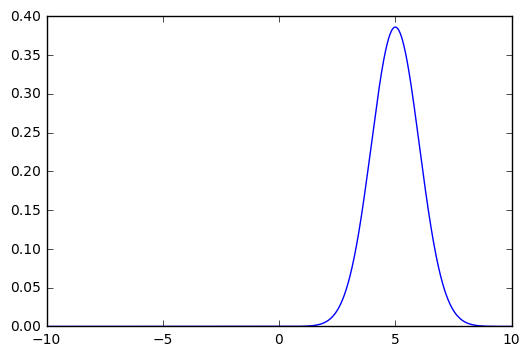

In [6]:
h = lambda x : integrate.quad(lambda y: pd(x,y), -np.infty, np.infty)[0]
X = np.arange(-10,10, 0.01)
HX = np.array([h(x) for x in X])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X,HX);

**Excersie 3:**

* Calculate the conditional probability $P(Y<3 | X>5) = \frac{P(Y<3 \cap X>5)}{P(X>5)}$. 
* If you use this model to model two stocks and use the result from exercise 1 how could you interpret the conditional expectation value?

In [7]:
EVA = integrate.nquad(lambda x,y: pd(x,y), [[5, np.infty],[-np.infty, 3]])
EVB = integrate.nquad(lambda x,y: pd(x,y), [[5, np.infty],[-np.infty, np.infty]])

print EVA[0]/EVB[0]

0.580430623256
